In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
#!git clone https://github.com/europeana/rd-img-classification-pilot.git

import sys
sys.path.append('../')

import torch
from src.inference import EuropeanaAPI, load_pytorch_model, make_prediction, plot_prediction, img_from_CHO


In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model, class_index_dict = load_pytorch_model(device)

In [19]:
class_index_dict

{'0': 'archaeological_site',
 '1': 'building',
 '2': 'ceramics',
 '3': 'clothing',
 '4': 'costume_accessories',
 '5': 'drawing',
 '6': 'furniture',
 '7': 'inscription',
 '8': 'jewellery',
 '9': 'map',
 '10': 'painting',
 '11': 'photograph',
 '12': 'postcard',
 '13': 'sculpture',
 '14': 'specimen',
 '15': 'tapestry',
 '16': 'textile',
 '17': 'toy',
 '18': 'weaponry',
 '19': 'woodwork'}

In [20]:
eu = EuropeanaAPI('api2demo')

URI:  http://data.europeana.eu/item/2084002/contributions_b5a7c940_a121_0136_7aed_6eee0af4a411
prediction: textile, confidence: 0.127


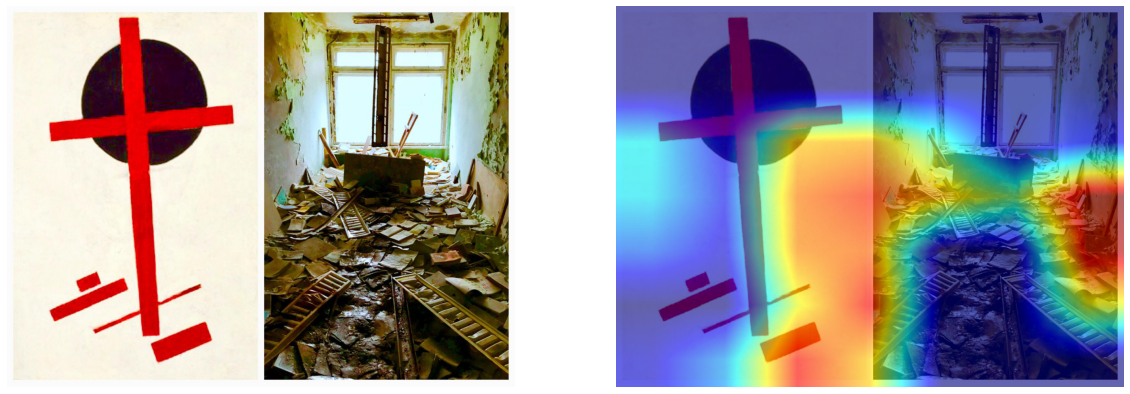






URI:  http://data.europeana.eu/item/2064105/Museu_ProvidedCHO_Hallwylska_museet_14323
prediction: building, confidence: 0.175


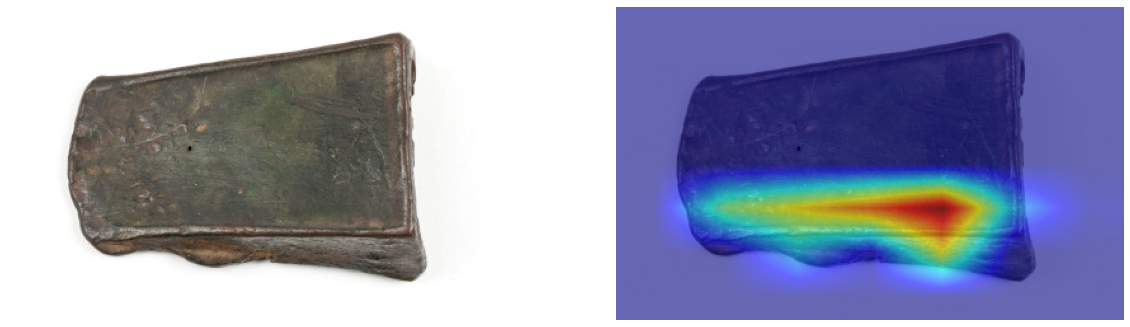






URI:  http://data.europeana.eu/item/2064105/Museu_ProvidedCHO_Hallwylska_museet_14334
prediction: archaeological_site, confidence: 0.123


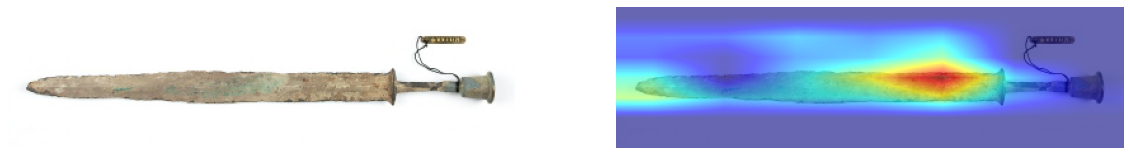






URI:  http://data.europeana.eu/item/2064105/Museu_ProvidedCHO_Hallwylska_museet_14368
prediction: building, confidence: 0.175


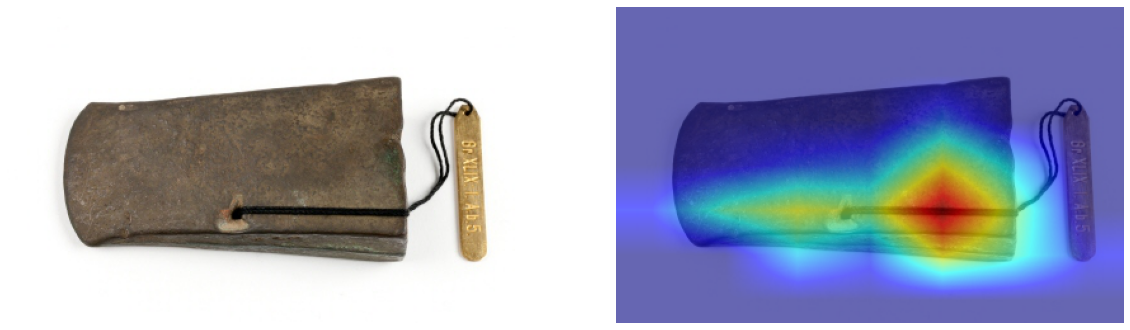






URI:  http://data.europeana.eu/item/2064105/Museu_ProvidedCHO_Hallwylska_museet_14369
prediction: archaeological_site, confidence: 0.211


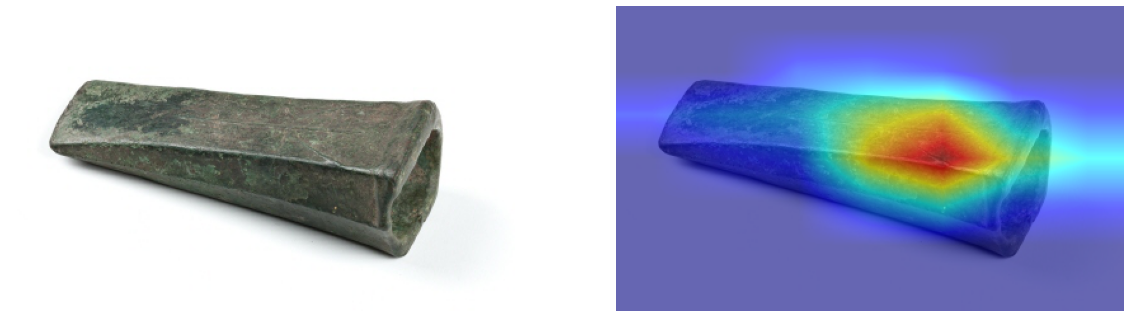






URI:  http://data.europeana.eu/item/2064105/Museu_ProvidedCHO_Hallwylska_museet_14440
prediction: archaeological_site, confidence: 0.176


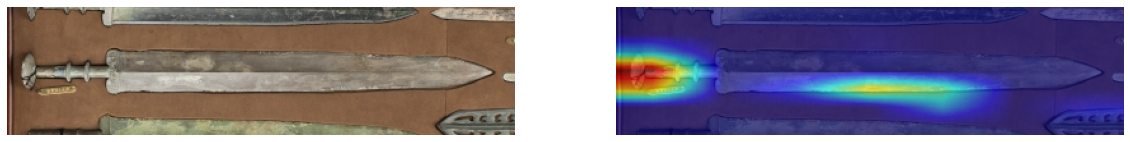






URI:  http://data.europeana.eu/item/2064105/Museu_ProvidedCHO_Hallwylska_museet_14485
prediction: textile, confidence: 0.221


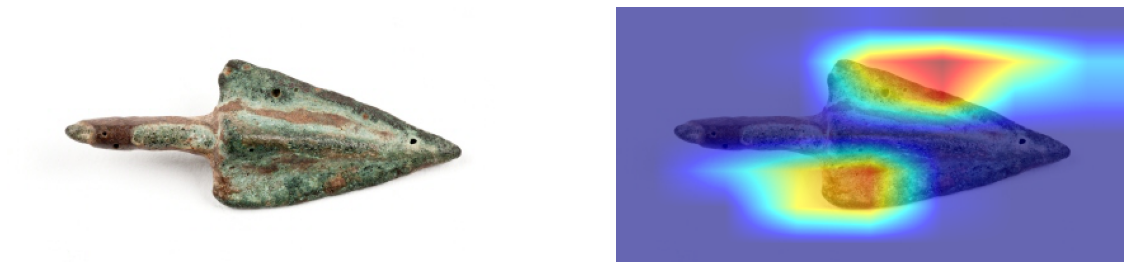






URI:  http://data.europeana.eu/item/2064105/Museu_ProvidedCHO_Hallwylska_museet_14492
prediction: building, confidence: 0.193


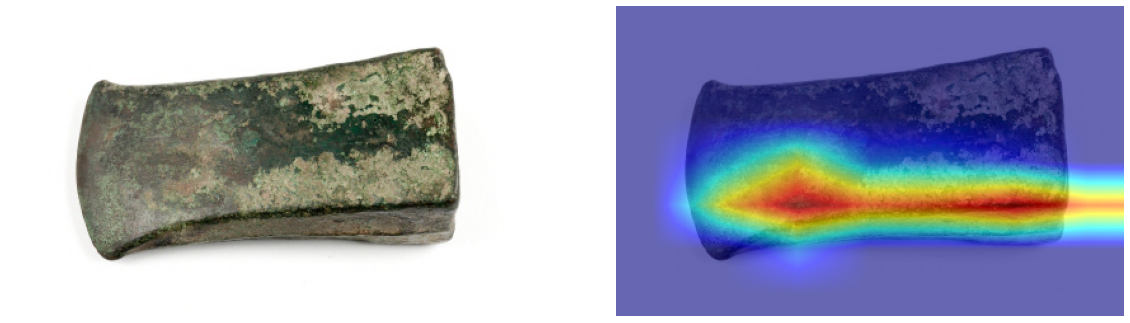






URI:  http://data.europeana.eu/item/2064105/Museu_ProvidedCHO_Hallwylska_museet_14516
prediction: archaeological_site, confidence: 0.129


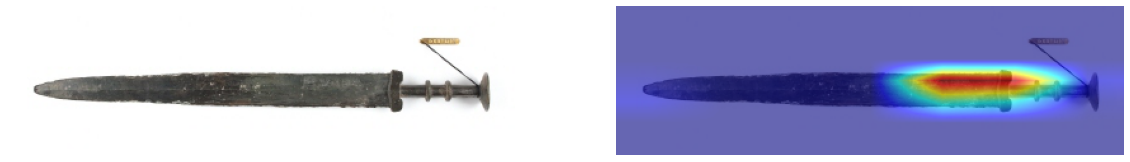






URI:  http://data.europeana.eu/item/2064105/Museu_ProvidedCHO_Hallwylska_museet_14552
prediction: building, confidence: 0.129


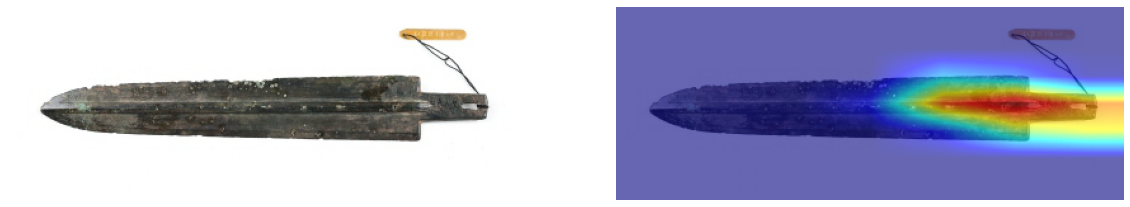






URI:  http://data.europeana.eu/item/2064105/Museu_ProvidedCHO_Hallwylska_museet_14563
prediction: building, confidence: 0.109


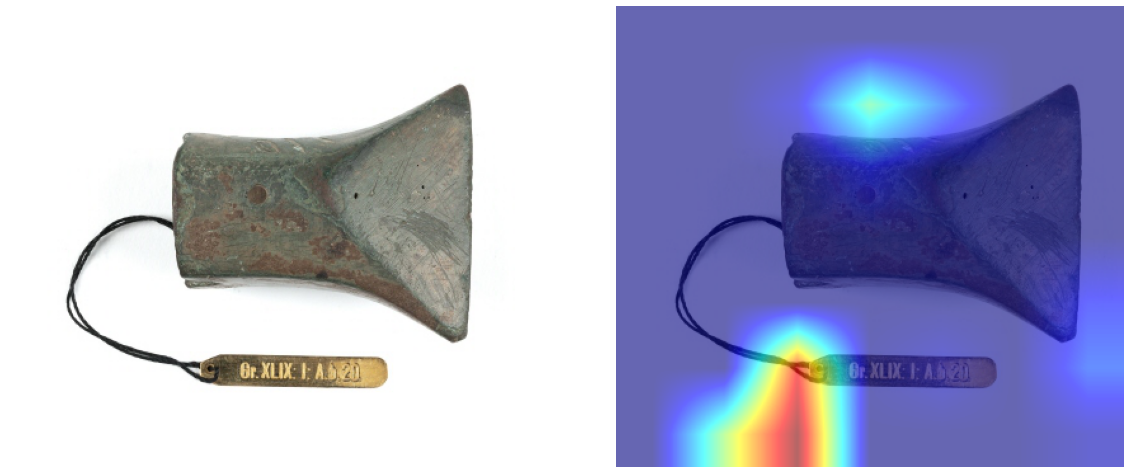






URI:  http://data.europeana.eu/item/2064105/Museu_ProvidedCHO_Hallwylska_museet_14602
prediction: building, confidence: 0.152


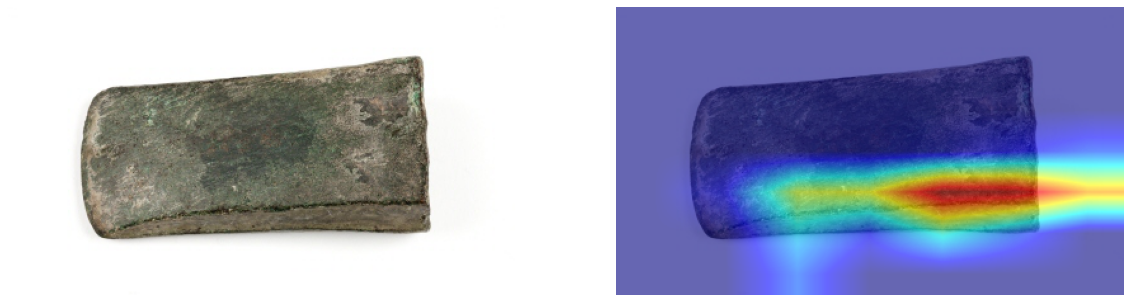






URI:  http://data.europeana.eu/item/2064105/Museu_ProvidedCHO_Hallwylska_museet_14605
prediction: archaeological_site, confidence: 0.176


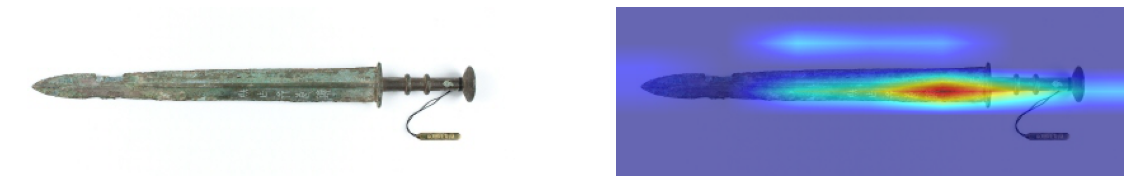






URI:  http://data.europeana.eu/item/2064105/Museu_ProvidedCHO_Hallwylska_museet_14606
prediction: archaeological_site, confidence: 0.129


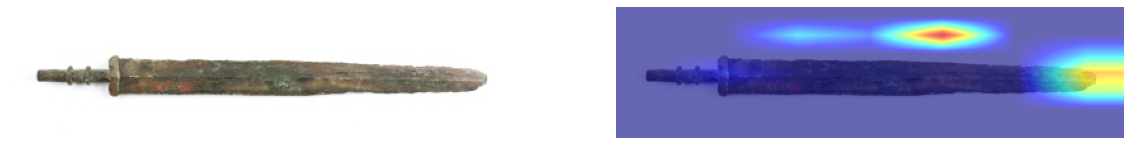






URI:  http://data.europeana.eu/item/2064105/Museu_ProvidedCHO_Hallwylska_museet_14650
prediction: building, confidence: 0.187


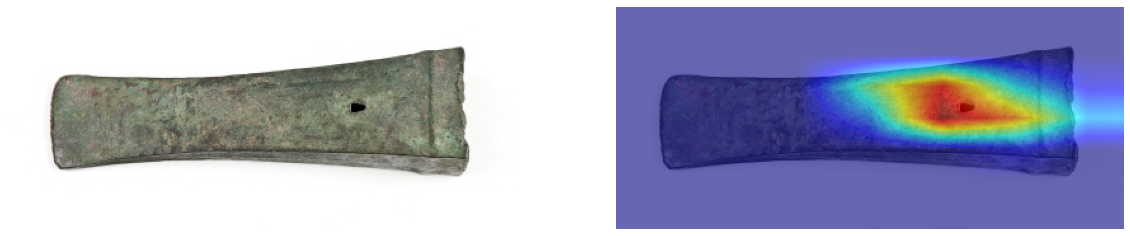






URI:  http://data.europeana.eu/item/2064105/Museu_ProvidedCHO_Hallwylska_museet_14656
prediction: archaeological_site, confidence: 0.255


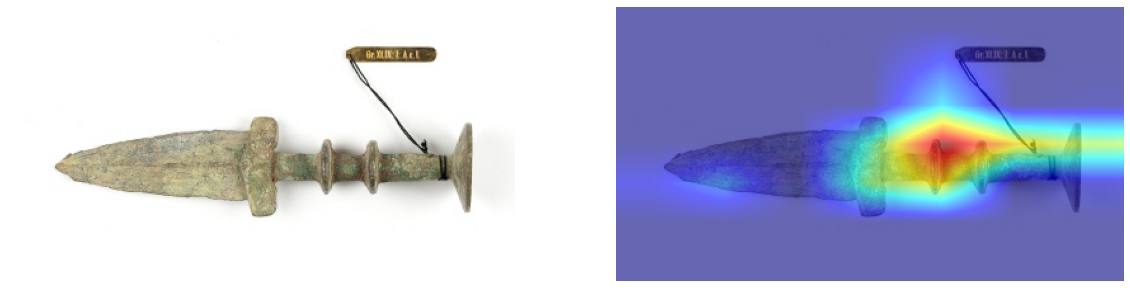






URI:  http://data.europeana.eu/item/2064105/Museu_ProvidedCHO_Hallwylska_museet_14661
prediction: building, confidence: 0.187


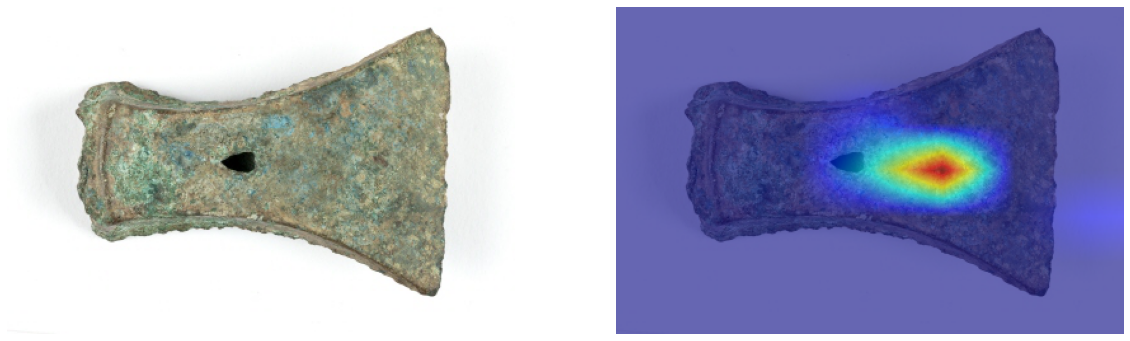






URI:  http://data.europeana.eu/item/2064105/Museu_ProvidedCHO_Hallwylska_museet_14669
prediction: drawing, confidence: 0.148


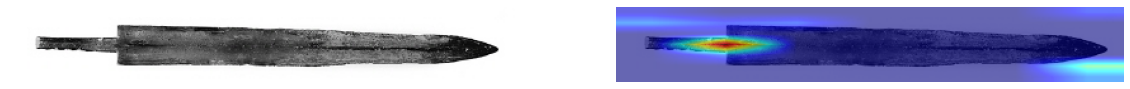






URI:  http://data.europeana.eu/item/2064105/Museu_ProvidedCHO_Hallwylska_museet_14886
prediction: drawing, confidence: 0.155


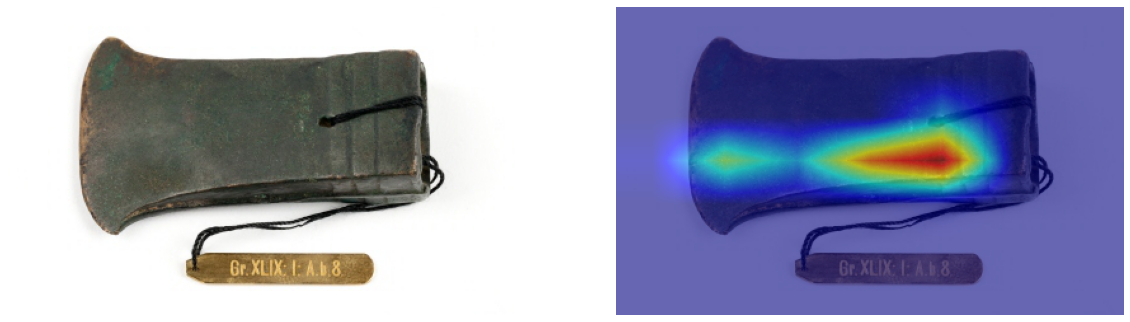

In [23]:

CHO_list = eu.search('weaponry',20)

for CHO in CHO_list:
    
  img = img_from_CHO(CHO)

  if not img:
        continue
    
  pred_idx, conf, XAI_img = make_prediction(model,img,device)

  pred =  class_index_dict[str(pred_idx)]

  print('URI: ','http://data.europeana.eu/item'+CHO['id'])
  print(f'prediction: {pred}, confidence: {conf:.3f}')
  
  plot_prediction(img,XAI_img)
  print(4*'\n')

    




